In [5]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [7]:
from sklearn.datasets import fetch_california_housing

import pandas as pd

# Load dataset  ​

housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target column (house price)  ​

df["Price"] = housing.target

# Display first few rows  ​

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# Define features (X) and target variable (y)  ​

X = df.drop(columns=["Price"])

y = df["Price"]

# Split dataset (80% train, 20% test)  ​

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features  ​

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model  ​

model = LinearRegression()

model.fit(X_train, y_train)

# Print model coefficients  ​

print("Model Coefficients:", model.coef_)

Model Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions  ​

y_pred = model.predict(X_test)



# Evaluate model performance  ​

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)



print(f"Mean Absolute Error: {mae:.2f}")

print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 0.53
Mean Squared Error: 0.56


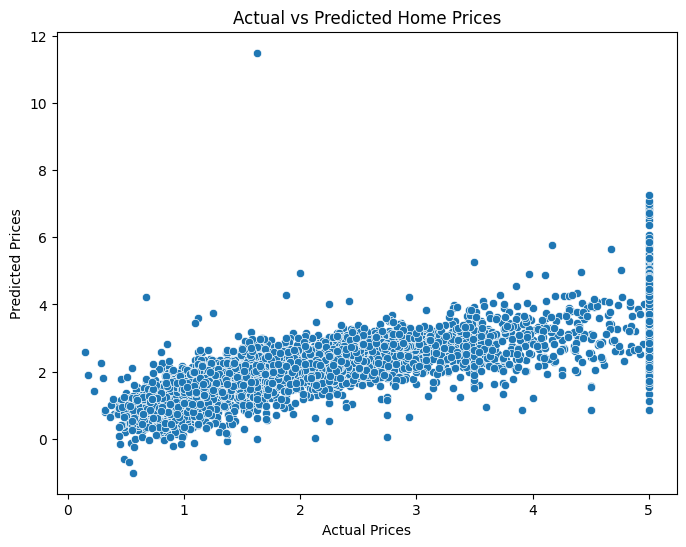

In [12]:
import matplotlib.pyplot as plt

import seaborn as sns

# Scatter plot of actual vs predicted prices  ​

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred)

plt.xlabel("Actual Prices")

plt.ylabel("Predicted Prices")

plt.title("Actual vs Predicted Home Prices")

plt.show()

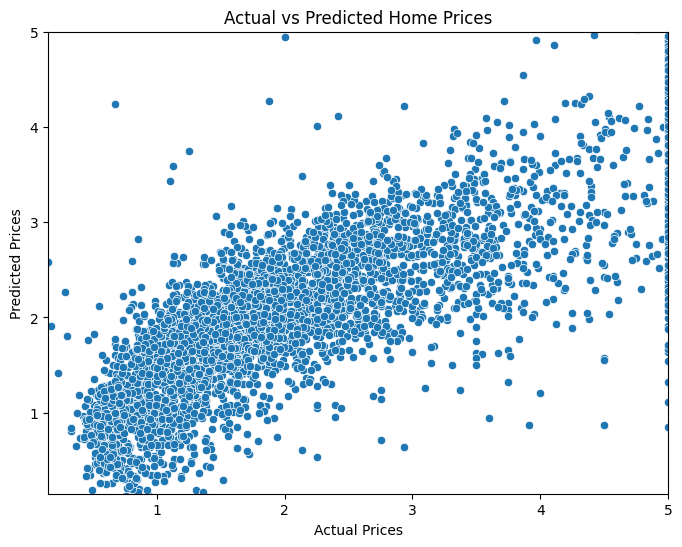

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns



# Scatter plot of actual vs predicted prices with equal axis scaling  ​

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred)

plt.xlabel("Actual Prices")

plt.ylabel("Predicted Prices")

plt.title("Actual vs Predicted Home Prices")

plt.xlim(min(y_test), max(y_test))

plt.ylim(min(y_test), max(y_test))

plt.show()

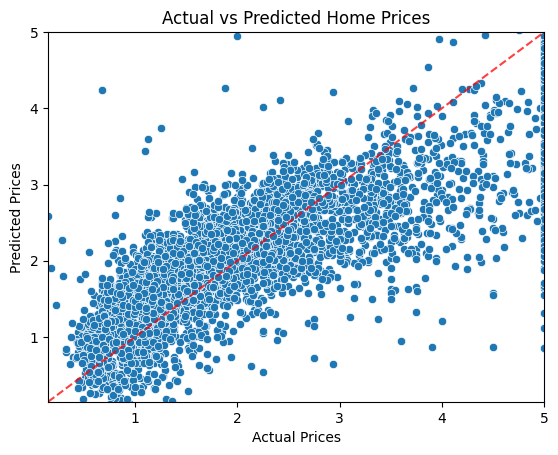

In [14]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

# Scatter plot of actual vs predicted prices with equal axis scaling  plt.figure(figsize=(8, 6))  ​

sns.scatterplot(x=y_test, y=y_pred)

plt.xlabel("Actual Prices")

plt.ylabel("Predicted Prices")

plt.title("Actual vs Predicted Home Prices")

plt.xlim(min(y_test), max(y_test))

plt.ylim(min(y_test), max(y_test))

# Add red line where x = y  ​

lims = [min(y_test), max(y_test)]

plt.plot(lims, lims, 'r--', alpha=0.75)

plt.show()

In [16]:
# Initialize and train the Random Forest Regressor​
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Make predictions​

y_pred_rf = rf_model.predict(X_test)



# Evaluate model performance​

mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_rf = mean_squared_error(y_test, y_pred_rf)



print(f"Random Forest - Mean Absolute Error: {mae_rf:.2f}")

print(f"Random Forest - Mean Squared Error: {mse_rf:.2f}")

Random Forest - Mean Absolute Error: 0.33
Random Forest - Mean Squared Error: 0.26


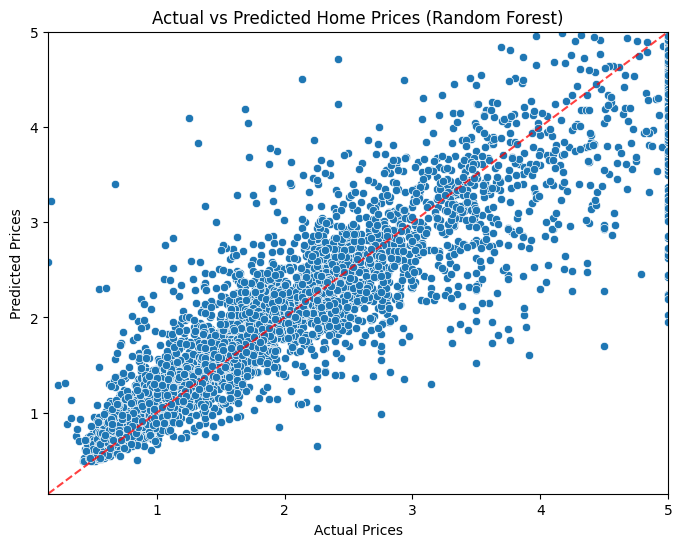

In [18]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np



# Scatter plot of actual vs predicted prices with equal axis scaling​

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_pred_rf)

plt.xlabel("Actual Prices")

plt.ylabel("Predicted Prices")

plt.title("Actual vs Predicted Home Prices (Random Forest)")

plt.xlim(min(y_test), max(y_test))

plt.ylim(min(y_test), max(y_test))


# Add red line where x = y​

lims = [min(y_test), max(y_test)]

plt.plot(lims, lims, 'r--', alpha=0.75)

plt.show()



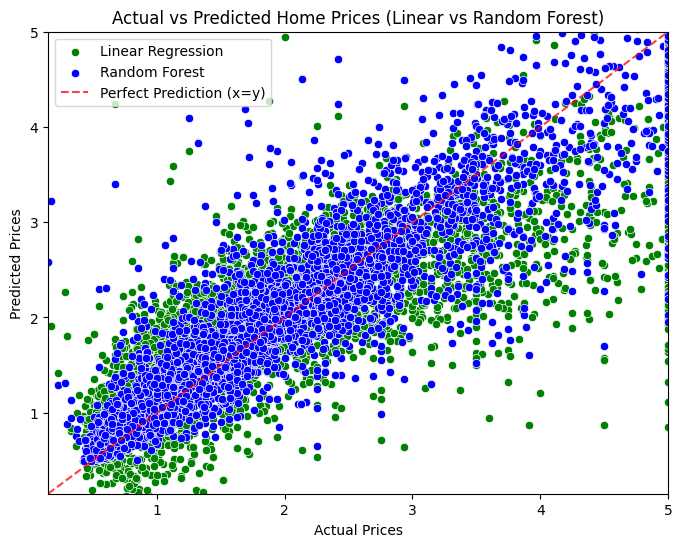

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot of actual vs predicted prices for both models​
plt.figure(figsize=(8, 6))

# Linear Regression (Green)​
sns.scatterplot(x=y_test, y=y_pred, color='green', label="Linear Regression")

# Random Forest Regression (Blue)​
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label="Random Forest")

# Add red x = y reference line​
lims = [min(y_test), max(y_test)]
plt.plot(lims, lims, 'r--', alpha=0.75, label="Perfect Prediction (x=y)")

# Labels and title​
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Home Prices (Linear vs Random Forest)")
plt.legend()
plt.xlim(lims)
plt.ylim(lims)

# Show plot​
plt.show()

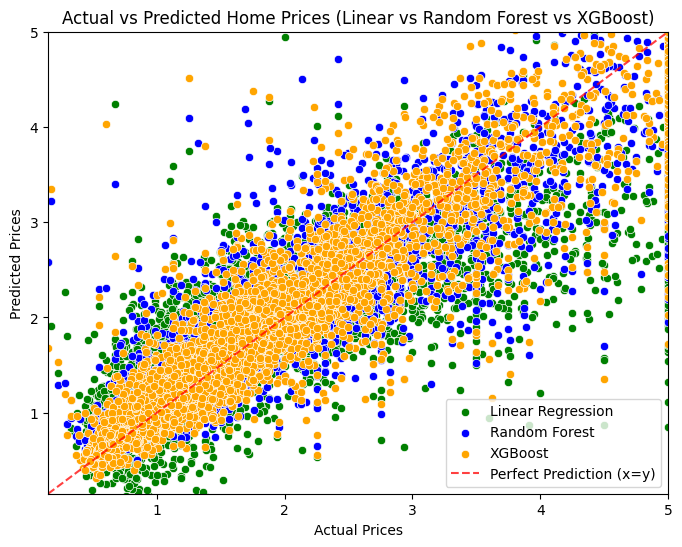

Model Evaluation Results:
Linear Regression - MAE: 0.53, MSE: 0.56
Random Forest - MAE: 0.33, MSE: 0.26
XGBoost - MAE: 0.31, MSE: 0.22


In [22]:
# Install XGBoost if not installed​
!pip install xgboost

# Import necessary libraries​
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset​
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split dataset (80% train, 20% test)​
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance​
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression Model​
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest Model​
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train XGBoost Model​
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Scatter plot of actual vs predicted prices for all models​
plt.figure(figsize=(8, 6))

# Linear Regression (Green)​
sns.scatterplot(x=y_test, y=y_pred_lr, color='green', label="Linear Regression")

# Random Forest Regression (Blue)​
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label="Random Forest")

# XGBoost Regression (Orange)​
sns.scatterplot(x=y_test, y=y_pred_xgb, color='orange', label="XGBoost")

# Add red x = y reference line​
lims = [min(y_test), max(y_test)]
plt.plot(lims, lims, 'r--', alpha=0.75, label="Perfect Prediction (x=y)")

# Labels and title​
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Home Prices (Linear vs Random Forest vs XGBoost)")
plt.legend()
plt.xlim(lims)
plt.ylim(lims)

# Show plot​
plt.show()

# Evaluate model performance​
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Print evaluation results​
print("Model Evaluation Results:")
print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}")
print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}")
print(f"XGBoost - MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}")

In [23]:
# Install XGBoost if not installed​
!pip install xgboost

# Import necessary libraries​
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset​
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split dataset (80% train, 20% test)​
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features​
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost Model​
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# **New Home Data for Prediction (Feature values only, no price)**​
new_home_data = np.array([

    [8.5, 41.0, 6.0, 1.0, 980.0, 3.0, 34.0, -118.0],  # Example home 1​

    [5.2, 32.0, 5.5, 2.0, 750.0, 2.0, 37.0, -121.0],  # Example home 2​

    [7.8, 45.0, 6.8, 1.0, 1200.0, 4.0, 33.5, -117.5]  # Example home 3​

])
# Standardize new home data using the same scaler from training​
new_home_data_scaled = scaler.transform(new_home_data)

# Use trained XGBoost model to predict prices for new homes​
predicted_prices = xgb_model.predict(new_home_data_scaled)

# Convert to DataFrame for display​
new_home_df = pd.DataFrame(new_home_data, columns=housing.feature_names)
new_home_df["Predicted Price"] = predicted_prices

# Display results​
print(new_home_df)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     8.5      41.0       6.0        1.0       980.0       3.0      34.0   
1     5.2      32.0       5.5        2.0       750.0       2.0      37.0   
2     7.8      45.0       6.8        1.0      1200.0       4.0      33.5   

   Longitude  Predicted Price  
0     -118.0         4.161739  
1     -121.0         3.277949  
2     -117.5         4.091396  


In [24]:
import joblib

joblib.dump(model, "housing_price_model.pkl")

['housing_price_model.pkl']